In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All libray imported')

All libray imported


In [2]:
# load the dataset
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# missing value
df.isnull().sum().any()

False

In [7]:
df['not.fully.paid'].value_counts()
# 0- full paid, 1 - not paid
# imbalanced data

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Exploratory data analysis of different factors of the dataset.

In [8]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

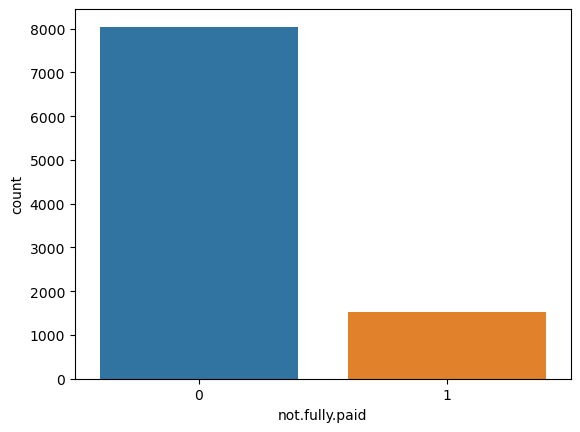

In [9]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

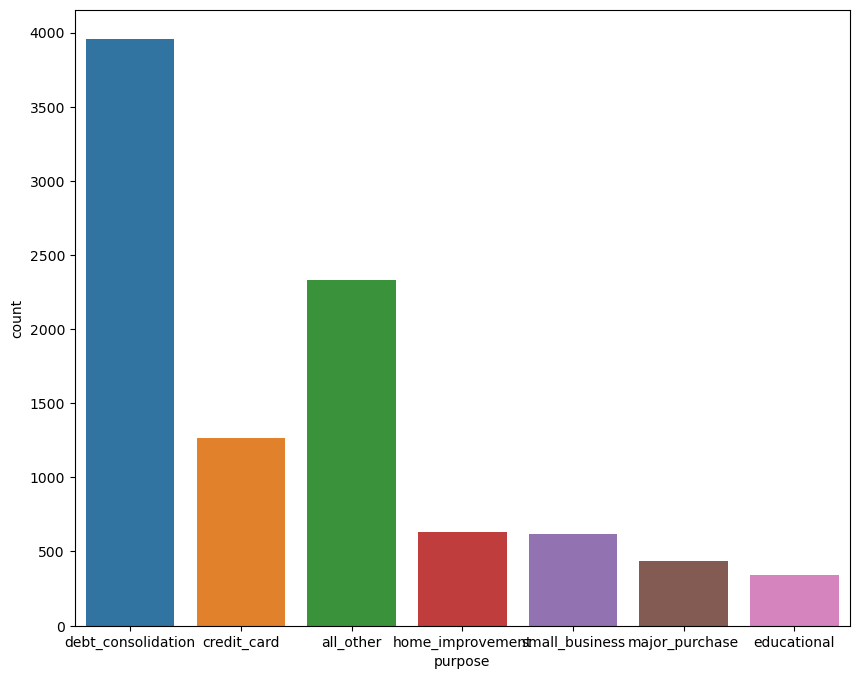

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['purpose'])
plt.show()

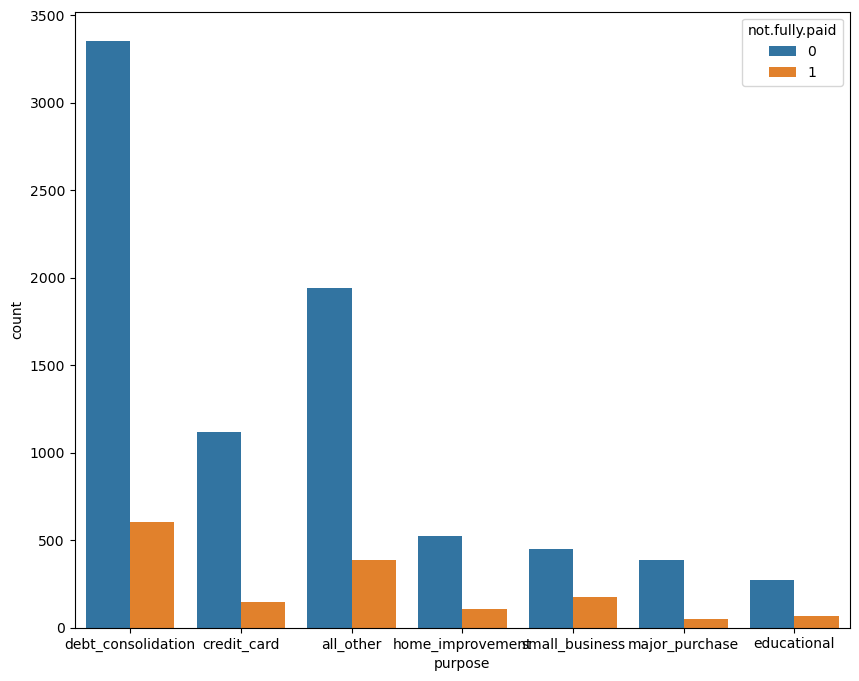

In [11]:
# purpose ---- not fully paid
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.show()

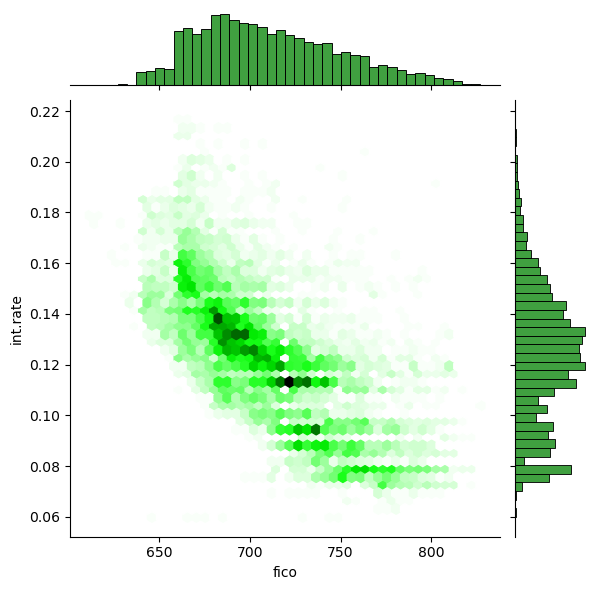

In [12]:
# bi variate analysis
sns.jointplot(x='fico',y='int.rate',data=df,kind='hex',color='g')
plt.show()

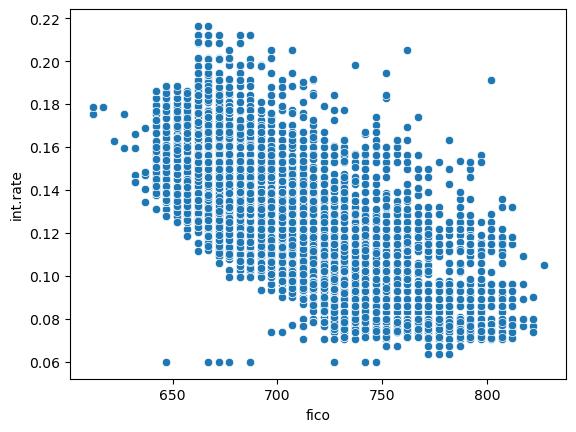

In [13]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.show()

<Axes: xlabel='fico', ylabel='Count'>

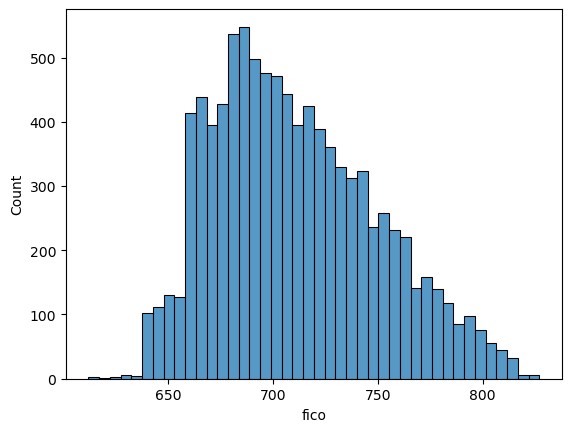

In [14]:
sns.histplot(df['fico'])

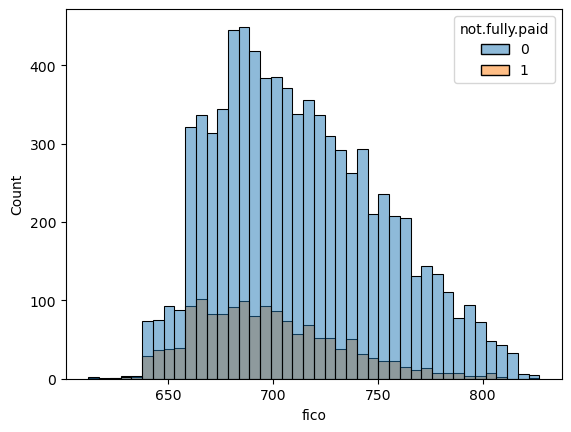

In [15]:
sns.histplot(x='fico',hue='not.fully.paid',data=df)
plt.show()

Feature Transformation

Transform categorical values into numerical values (discrete)

In [16]:
# handle imbalanced dataset
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [17]:
not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [18]:
not_fully_paid_0.shape

(8045, 14)

In [19]:
not_fully_paid_1.shape

(1533, 14)

In [20]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)


In [21]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [22]:
# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [23]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [24]:
new_df.shape

(16090, 14)

In [25]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [26]:
# convert purpose into num data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [28]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Additional Feature Engineering

### You will check the correlation between features and will drop those features which have a strong correlation

### This will help reduce the number of features and will leave you with the most relevant features

In [29]:
new_df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.028985,-0.295397,0.048983,0.021879,-0.093981,0.376512,0.099194,-0.179343,-0.096588,-0.539892,-0.055165,-0.060941,-0.194886
purpose,0.028985,1.000000,0.141206,0.208780,0.117727,-0.057587,0.077321,0.067397,0.070768,-0.075284,0.032059,0.004518,0.010647,0.056376
int.rate,-0.295397,0.141206,1.000000,0.274147,0.081169,0.205845,-0.677472,-0.098778,0.079079,0.410572,0.190752,0.149913,0.108259,0.224096
installment,0.048983,0.208780,0.274147,1.000000,0.475232,0.034087,0.108539,0.181278,0.248515,0.055611,-0.014221,-0.002551,-0.007788,0.067667
log.annual.inc,0.021879,0.117727,0.081169,0.475232,1.000000,-0.026614,0.109126,0.341266,0.380654,0.076413,0.031497,0.021059,0.018113,-0.043470
dti,-0.093981,-0.057587,0.205845,0.034087,-0.026614,1.000000,-0.218138,0.098406,0.170314,0.324065,0.023346,-0.031926,0.010381,0.044382
fico,0.376512,0.077321,-0.677472,0.108539,0.109126,-0.218138,1.000000,0.265458,0.011582,-0.498586,-0.198836,-0.197176,-0.156904,-0.210132
days.with.cr.line,0.099194,0.067397,-0.098778,0.181278,0.341266,0.098406,0.265458,1.000000,0.245360,0.018215,-0.034329,0.081409,0.068256,-0.041771
revol.bal,-0.179343,0.070768,0.079079,0.248515,0.380654,0.170314,0.011582,0.245360,1.000000,0.163139,0.021445,-0.031002,-0.032119,0.059540
revol.util,-0.096588,-0.075284,0.410572,0.055611,0.076413,0.324065,-0.498586,0.018215,0.163139,1.000000,-0.018445,-0.056198,0.077301,0.104964


<Axes: >

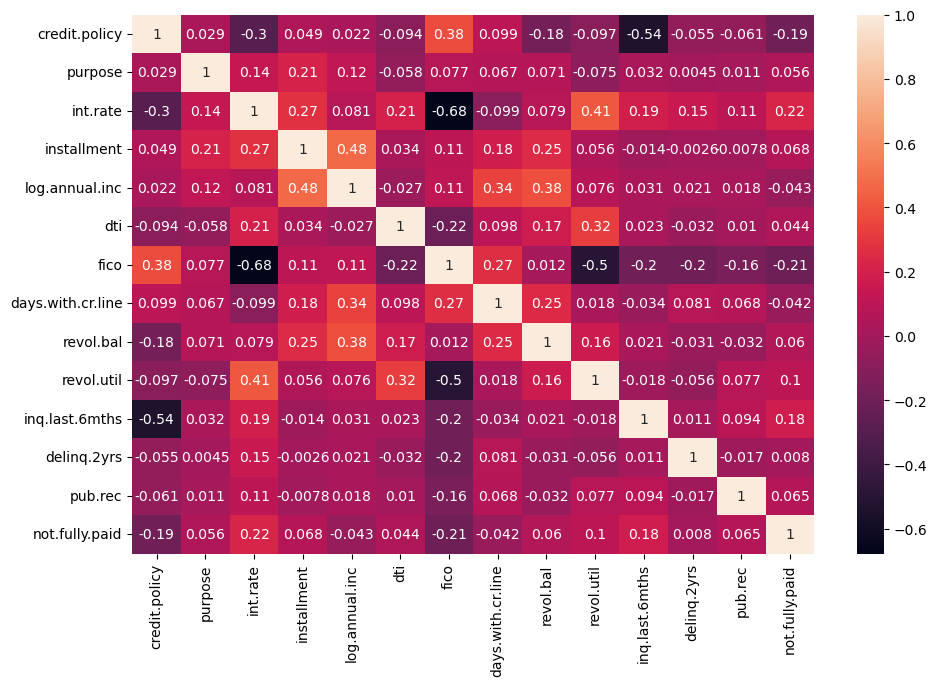

In [30]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [31]:
# see the sorted results
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.224096
fico                 0.210132
credit.policy        0.194886
inq.last.6mths       0.177114
revol.util           0.104964
installment          0.067667
pub.rec              0.065495
revol.bal            0.059540
purpose              0.056376
dti                  0.044382
log.annual.inc       0.043470
days.with.cr.line    0.041771
delinq.2yrs          0.007957
Name: not.fully.paid, dtype: float64

In [32]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [33]:
# take columns
X=new_df[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [34]:
X.shape

(16090, 9)

In [35]:
y=new_df['not.fully.paid']

In [36]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [37]:
X_train.shape

(12872, 9)

In [38]:
X_test.shape

(3218, 9)

In [39]:
X_train

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
5608,1,4,0.1287,168.17,682,1465,63.7,1,0
6107,1,2,0.1600,878.94,732,33107,98.8,1,0
7112,1,2,0.1645,583.73,667,19257,92.6,1,0
9320,0,2,0.1496,346.45,672,5494,83.2,4,0
3178,1,6,0.1442,171.92,677,4685,27.6,0,0
...,...,...,...,...,...,...,...,...,...
3657,1,2,0.1505,173.46,687,3329,95.1,0,0
4030,1,6,0.1853,538.98,717,8476,66.7,1,0
70,1,1,0.0743,155.38,812,813,1.0,0,0
2183,1,6,0.1505,520.37,677,31724,90.4,2,0


In [40]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Create a deep learning model using Keras with Tensorflow backend

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# create the architecture
# 2 ANN layer
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))


model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

# output layer
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
early_stop=EarlyStopping(monitor='val_loss',min_delta=0.001,mode='min',patience=10,verbose=1)

In [47]:
model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 2s 16ms/step - loss: 0.7096 - accuracy: 0.5172 - val_loss: 0.6820 - val_accuracy: 0.5640
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5657 - val_loss: 0.6710 - val_accuracy: 0.5743
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6708 - accuracy: 0.5886 - val_loss: 0.6664 - val_accuracy: 0.5746
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6626 - accuracy: 0.5934 - val_loss: 0.6632 - val_accuracy: 0.5811
Epoch 5/50
51/51 [==============================] - 0s 10ms/step - loss: 0.6628 - accuracy: 0.5930 - val_loss: 0.6610 - val_accuracy: 0.5814
Epoch 6/50
51/51 [==============================] - 0s 9ms/step - loss: 0.6633 - accuracy: 0.5934 - val_loss: 0.6596 - val_accuracy: 0.5792
Epoch 7/50
51/51 [==============================] - 0s 7ms/step - loss: 0.6563 - accuracy: 0.6014 - val_loss: 0.6580 - val_accuracy: 0.5833
Epoch 8/50
51/51 [

In [48]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 1s 10ms/step - loss: 0.6395 - accuracy: 0.6230 - val_loss: 0.6494 - val_accuracy: 0.6066
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.6414 - accuracy: 0.6241 - val_loss: 0.6495 - val_accuracy: 0.6066
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6413 - accuracy: 0.6245 - val_loss: 0.6492 - val_accuracy: 0.6057
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 0.6401 - accuracy: 0.6231 - val_loss: 0.6493 - val_accuracy: 0.6094
Epoch 5/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6409 - accuracy: 0.6233 - val_loss: 0.6490 - val_accuracy: 0.6100
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 0.6411 - accuracy: 0.6210 - val_loss: 0.6489 - val_accuracy: 0.6091
Epoch 7/50
51/51 [==============================] - 0s 7ms/step - loss: 0.6382 - accuracy: 0.6294 - val_loss: 0.6492 - val_accuracy: 0.6088
Epoch 8/50
51/51 [=

In [49]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6168


[0.6466687917709351, 0.6168427467346191]

In [50]:
y_pred=model.predict(X_test)

101/101 [==============================] - 0s 3ms/step


In [51]:
y_pred

array([[0.7256907 ],
       [0.15615022],
       [0.61189044],
       ...,
       [0.40956312],
       [0.63250375],
       [0.32325405]], dtype=float32)

In [52]:
predictions=(y_pred>0.5).astype('int')

In [53]:
predictions

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [54]:
y_test

7717    1
2214    0
8562    1
8378    1
9058    0
       ..
15      0
5810    0
4322    1
9140    0
4078    0
Name: not.fully.paid, Length: 3218, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(predictions,y_test)

0.6168427594779367

In [56]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1695
           1       0.59      0.62      0.60      1523

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [57]:
model.save('loan_default1.h5')

C:\Users\10030099\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model2 Architecture


In [58]:
# batch Normalization
from tensorflow.keras.layers import BatchNormalization

In [59]:
# create the architecture model2
# First ANN layer
model1=Sequential()
model1.add(Dense(128,activation='relu',input_shape=[9]))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# Second ANN layer
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
           

# third ANN layer
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# output layer
model1.add(Dense(1,activation='sigmoid'))

In [60]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [61]:
# compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
history=model1.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/100
51/51 [==============================] - 5s 22ms/step - loss: 0.7569 - accuracy: 0.5672 - val_loss: 0.6540 - val_accuracy: 0.6022
Epoch 2/100
51/51 [==============================] - 1s 13ms/step - loss: 0.6946 - accuracy: 0.5885 - val_loss: 0.6508 - val_accuracy: 0.6016
Epoch 3/100
51/51 [==============================] - 1s 17ms/step - loss: 0.6754 - accuracy: 0.6004 - val_loss: 0.6496 - val_accuracy: 0.6025
Epoch 4/100
51/51 [==============================] - 1s 17ms/step - loss: 0.6691 - accuracy: 0.6012 - val_loss: 0.6491 - val_accuracy: 0.6013
Epoch 5/100
51/51 [==============================] - 1s 13ms/step - loss: 0.6615 - accuracy: 0.6085 - val_loss: 0.6478 - val_accuracy: 0.6060
Epoch 6/100
51/51 [==============================] - 1s 13ms/step - loss: 0.6549 - accuracy: 0.6101 - val_loss: 0.6453 - val_accuracy: 0.6109
Epoch 7/100
51/51 [==============================] - 1s 14ms/step - loss: 0.6520 - accuracy: 0.6172 - val_loss: 0.6453 - val_accuracy: 0.6134
Epoch 

51/51 [==============================] - 1s 13ms/step - loss: 0.5982 - accuracy: 0.6750 - val_loss: 0.6012 - val_accuracy: 0.6734
Epoch 59/100
51/51 [==============================] - 1s 16ms/step - loss: 0.5891 - accuracy: 0.6837 - val_loss: 0.6001 - val_accuracy: 0.6703
Epoch 60/100
51/51 [==============================] - 1s 15ms/step - loss: 0.5939 - accuracy: 0.6767 - val_loss: 0.5980 - val_accuracy: 0.6734
Epoch 61/100
51/51 [==============================] - 1s 14ms/step - loss: 0.5916 - accuracy: 0.6846 - val_loss: 0.5967 - val_accuracy: 0.6740
Epoch 62/100
51/51 [==============================] - 1s 14ms/step - loss: 0.5886 - accuracy: 0.6837 - val_loss: 0.5930 - val_accuracy: 0.6846
Epoch 63/100
51/51 [==============================] - 1s 13ms/step - loss: 0.5894 - accuracy: 0.6829 - val_loss: 0.5926 - val_accuracy: 0.6781
Epoch 64/100
51/51 [==============================] - 1s 14ms/step - loss: 0.5920 - accuracy: 0.6812 - val_loss: 0.5934 - val_accuracy: 0.6765
Epoch 65/100

In [63]:
model1.evaluate(X_test,y_test)

101/101 [==============================] - 0s 4ms/step - loss: 0.5620 - accuracy: 0.6948


[0.5620299577713013, 0.6948415040969849]

In [64]:
model1.evaluate(X_train,y_train)

403/403 [==============================] - 2s 4ms/step - loss: 0.4961 - accuracy: 0.7608


[0.49606743454933167, 0.7607986330986023]

# Hyparameter tuning in Keras

In [65]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


In [66]:
import keras_tuner
import tensorflow

Using TensorFlow backend


In [67]:
def build_model(hp):
    model=Sequential()
    
    # first hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
                      
        
    # Second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
     # third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    model.add(Dense(1,activation='sigmoid'))
    
    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
        
    model.compile(loss='binary_crossentropy',
                  optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                 metrics=['accuracy'])
    return model

In [68]:
import keras_tuner as kt

In [69]:
build_model(kt.HyperParameters())

In [70]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=10                   
                      )

Reloading Tuner from .\untitled_project\tuner0.json


In [71]:
rtuner.search(X_train,y_train,
             epochs=50,validation_data=(X_test,y_test),
             verbose=2)

Trial 10 Complete [00h 03m 10s]
val_accuracy: 0.59664386510849

Best val_accuracy So Far: 0.6998135447502136
Total elapsed time: 01h 17m 06s


In [72]:
par=rtuner.get_best_hyperparameters()

##### for h_param in [f"units{i}" for i in range(1,4)]+['learning_rate']:
    print(h_param,rtuner.get_best_hyperparameters()[0].get(h_param))


In [73]:
par

In [74]:
models=rtuner.get_best_models()

In [75]:
len(models)

1

In [76]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 528)               5280      
                                                                 
 batch_normalization (Batch  (None, 528)               2112      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 528)               0         
                                                                 
 dense_1 (Dense)             (None, 528)               279312    
                                                                 
 batch_normalization_1 (Bat  (None, 528)               2112      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 528)               0

In [77]:
y_pred=models[0].predict(X_test)>=0.5

101/101 [==============================] - 1s 7ms/step


In [78]:
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6998135487880671